In [2]:
from datetime import datetime
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extract the timestamp from the file names
def extract_timestamp(file_path):
    filename = os.path.basename(file_path)
    timestamp_str = filename.split('_')[1] + '_' + filename.split('_')[2].split('.')[0]  # Extracting full timestamp
    return datetime.strptime(timestamp_str, '%Y%m%d_%H%M%S')


def get_latest_result_file(model_name, task_name, base_dir='/home/aiops/zhuty/opencompass/outputs'):
    # Construct the search pattern
    search_pattern = os.path.join(base_dir, f"{model_name}*/{task_name}/*/summary/*.csv")

    # Debug: print the search pattern
    # print("Search pattern:", search_pattern)

    # Find all matching files
    files = glob.glob(search_pattern)

    # Debug: print the found files
    # print("Found files:", files)

    if not files:
        # raise FileNotFoundError("No result files found.")
        return None

    latest_file = max(files, key=lambda x: extract_timestamp(x))

    return latest_file


# Example usage
model_name = 'tiny_LLaMA_1b_8k_cc_merged_v1_8k_iter-400000-ckpt-step-50000_hf'
task_name = 'ARC_c_ppl'
latest_file = get_latest_result_file(model_name, task_name)
print("Latest result file:", latest_file)
# print("rm -r  /home/aiops/zhuty/opencompass/outputs/*/hellaswag_ppl")

Latest result file: /home/aiops/zhuty/opencompass/outputs/tiny_LLaMA_1b_8k_cc_merged_v1_8k_iter-400000-ckpt-step-50000_hf/ARC_c_ppl/20240531_075300/summary/summary_20240531_075300.csv
Latest result file: /home/aiops/zhuty/opencompass/outputs/tiny_LLaMA_1b_8k_cc_merged_v1_8k_iter-400000-ckpt-step-50000_hf/ARC_c_ppl/20240531_075300/summary/summary_20240531_075300.csv


In [18]:
def parse_csv_file(file_path):
    df = pd.read_csv(file_path)
    # assert len(df) == 1, f"Expected 1 row, got {len(df)} rows, the df is {df}"
    model_name = df.columns[-1]
    results = []
    for i, row in df.iterrows():
        results.append( {"model_name": model_name, "value": row[model_name],
                             "metric": row['metric'], 'dataset': row['dataset'], })
    return results

In [9]:
df

,dataset,version,metric,mode,tiny_LLaMA_1b_8k_cc_merged_v1_8k_iter-600000-ckpt-step-75000_hf_hf
0,LongBench_2wikimqa,6b3efc,score,gen,10.26
1,LongBench_hotpotqa,6b3efc,score,gen,6.68
2,LongBench_musique,6b3efc,score,gen,3.36
3,LongBench_multifieldqa_en,d3838e,score,gen,14.66
4,LongBench_multifieldqa_zh,e9a7ef,score,gen,5.02
5,LongBench_narrativeqa,a68305,score,gen,2.53
6,LongBench_qasper,6b3efc,score,gen,10.51
7,LongBench_triviaqa,d30cb9,score,gen,37.14
8,LongBench_gov_report,54c5b0,score,gen,12.74
9,LongBench_qmsum,d33331,score,gen,16.11


In [37]:
size = '1b'

ds_versions, context_size = ['cc_merged_v2_8k', 'cc_8k' , 'intramask_cc_8k' ,'adamask_cc_merged_v2_8k', 'cc_merged_v2_8k_intracccont', 'cc_merged_v1_8k'], '8k'

ds_versions , context_size= ['cc_merged_v2_16k_intracccont', 'cc_16k_intracccont', 'intramask_cc_16k_intracccont', 'adamask_cc_merged_v2_16k_intracccont', 'intramask_cc_merged_v2_16k_intracccont',] , '16k'
# tasks_and_shots =[('wikitext', 0), ('lambada_standard', 0), ('triviaqa',5),('nq_open',5), ('hellaswag',5), ('squadv2',5), ('quality', 0)]

all_tasks = {'group1': ['wikitext', 'lambada_standard'],
'group2': ['triviaqa', 'nq_open', 'webqs', 'hellaswag', 'squadv2'],
'group3': ['squadv2'],
         'regular': [('piqa', 0), ('copa', 0), ('openbookqa', 10),
                 ('lambada_openai', 0), ('hellaswag', 0), ('winogrande', 5),
                 ('squadv2', 3), ('boolq',0), ('coqa',0),
                 ('arc_easy', 3), ('arc_challenge', 3),],
'longbench': ['longbench_trec_gen']
         }
priority = "low"

tasks_and_shots = all_tasks['longbench']
commands = []
rows = []
for ds_version in ds_versions:
    for task in [ 'longbench_samsum_gen', 'longbench_trec_gen']:
            #['hellaswag_ppl', 'SuperGLUE_BoolQ_ppl', 'SuperGLUE_COPA_ppl',  'ARC_c_ppl', 'ARC_e_ppl', 'nq_gen',
        #'winograd_ppl',  'lambada_gen', 'winogrande_ppl_55a66e','nq_open_1shot_gen_01cf41', 'nq_open_1shot_gen_20a989',
        #'nq_open_gen_e93f8a'
#                 ]:
        # candidate tasks: QuALITY_gen, triviaqarc_gen',
        # task_performance = {}
        # for ds_version in ['cc_merged_v2_8k', 'intramask_cc_8k', 'intramask_cc_merged_v2_8k', 'adamask_cc_merged_v2_8k', 'cc_merged_v2_8k_intrav2cont','cc_8k',]:
        # for step in range(27500, 67500 + 2500, 2500):
        # for step in range(50000, 80000 , 5000):
        for step in [77500]:
                # BASE_PATH = f"/home/aiops/zhuty/tinyllama/scripts/lm_harness_eval/out/home/aiops/zhuty/tinyllama/out/tiny_LLaMA_1b_8k_{ds_version}_8k/iter-380000-ckpt-step-47500_hf"
                # BASE_PATH = f"/home/aiops/zhuty/tinyllama/scripts/lm_harness_eval/out/home/aiops/zhuty/tinyllama/out/tiny_LLaMA_{size}_8k_{ds_version}/iter-{step*4:06}-ckpt-step-{step}_hf"
                # iter_name = f"iter-{step*4:06}-ckpt-step-{step}_hf"
            if step < 50000 and 'intracccont' in ds_version:
                continue
            iter_name = f"iter-{step*8:06}-ckpt-step-{step}_hf"
            model_name = f"tiny_LLaMA_{size}_{context_size}_{ds_version}_{iter_name}"

            latest_file = get_latest_result_file(model_name, task)
            is_missing = True
            if latest_file is not None:
                df = pd.read_csv(latest_file)
                row_dicts = parse_csv_file(latest_file)
                print(len(row_dicts))
                for row_dict in row_dicts:
                    # print(row_dict)
                    if row_dict['metric'] == '-':
                        is_missing = True
                        continue
                    is_missing = False
                    row_dict['task'] = row_dict['dataset'] + f" ({task})"
                    row_dict['ds_version'] = ds_version
                    row_dict['step'] = step
                    row_dict['iter_name'] = iter_name
                rows.extend(row_dicts)

            if is_missing:
                print(f"Missing {model_name} {task} {iter_name}")
                max_len = 8192 if '8k' in context_size else 16384
                command = f"mkdir -p outputs/{model_name}/{task};  python run.py --datasets {task}  --hf-path tyzhu/{model_name}  --hf-type base --hf-num-gpus 1  --batch-size 1 --work-dir outputs/{model_name}/{task} --max-seq-len {max_len}         --tokenizer-kwargs padding_side='left' truncation='left' trust_remote_code=True add_special_tokens=False add_bos_token=False --model-kwargs  use_flash_attention_2=True device_map='auto' "
                commands.append((command, model_name, task))
                continue
            # print("Got", f"{model_name} {task} {iter_name}")
                # print(f"Skipping {model_name} {task} {iter_name}")

print("Total commands:", len(commands))
print("in total collected", len(rows))

1
1
1
1
1
1
1
1
1
1
Total commands: 0
in total collected 10


In [38]:
len(rows)

10

In [39]:
final_commands = []
high_string = "-p high" if priority == "high" else ""
for command, model_name, task  in commands:
    # print(command)
    jobname = f"{task}{model_name}".replace("_", "").replace("-", "").lower()[:39]
    curr = f"""sailctl job create {jobname} -g 1  --debug   --command-line-args  " source /home/aiops/zhuty/opencompass.sh ; cd /home/aiops/zhuty/opencompass/ ;   {" ; sleep 2; ".join([command])} " {high_string}"""
    final_commands.append(curr)

batch_size = 30
batches = [final_commands[i:i + batch_size] for i in range(0, len(final_commands), batch_size)]

with open("/home/aiops/zhuty/tinyllama/scripts/compass_eval/run_1b_batches.sh", "w") as f:
    for batch in batches:
        for command in batch:
            f.write(f"{command} &\n")
        f.write("wait\n")
        f.write("sleep 1\n")  # Add a sleep between batches if needed

In [46]:
df_new = pd.DataFrame(rows)
df_new = df_new[df_new['metric'] != '-']

In [41]:
df_new

,model_name,value,metric,dataset,task,ds_version,step,iter_name
0,tiny_LLaMA_1b_16k_cc_merged_v2_16k_intracccont...,16.99,score,LongBench_samsum,LongBench_samsum (longbench_samsum_gen),cc_merged_v2_16k_intracccont,77500,iter-620000-ckpt-step-77500_hf
1,tiny_LLaMA_1b_16k_cc_merged_v2_16k_intracccont...,24.50,score,LongBench_trec,LongBench_trec (longbench_trec_gen),cc_merged_v2_16k_intracccont,77500,iter-620000-ckpt-step-77500_hf
2,tiny_LLaMA_1b_16k_cc_16k_intracccont_iter-6200...,17.42,score,LongBench_samsum,LongBench_samsum (longbench_samsum_gen),cc_16k_intracccont,77500,iter-620000-ckpt-step-77500_hf
3,tiny_LLaMA_1b_16k_cc_16k_intracccont_iter-6200...,15.25,score,LongBench_trec,LongBench_trec (longbench_trec_gen),cc_16k_intracccont,77500,iter-620000-ckpt-step-77500_hf
4,tiny_LLaMA_1b_16k_intramask_cc_16k_intracccont...,17.97,score,LongBench_samsum,LongBench_samsum (longbench_samsum_gen),intramask_cc_16k_intracccont,77500,iter-620000-ckpt-step-77500_hf
5,tiny_LLaMA_1b_16k_intramask_cc_16k_intracccont...,14.00,score,LongBench_trec,LongBench_trec (longbench_trec_gen),intramask_cc_16k_intracccont,77500,iter-620000-ckpt-step-77500_hf
6,tiny_LLaMA_1b_16k_adamask_cc_merged_v2_16k_int...,14.87,score,LongBench_samsum,LongBench_samsum (longbench_samsum_gen),adamask_cc_merged_v2_16k_intracccont,77500,iter-620000-ckpt-step-77500_hf
7,tiny_LLaMA_1b_16k_adamask_cc_merged_v2_16k_int...,21.75,score,LongBench_trec,LongBench_trec (longbench_trec_gen),adamask_cc_merged_v2_16k_intracccont,77500,iter-620000-ckpt-step-77500_hf
8,tiny_LLaMA_1b_16k_intramask_cc_merged_v2_16k_i...,18.33,score,LongBench_samsum,LongBench_samsum (longbench_samsum_gen),intramask_cc_merged_v2_16k_intracccont,77500,iter-620000-ckpt-step-77500_hf
9,tiny_LLaMA_1b_16k_intramask_cc_merged_v2_16k_i...,25.25,score,LongBench_trec,LongBench_trec (longbench_trec_gen),intramask_cc_merged_v2_16k_intracccont,77500,iter-620000-ckpt-step-77500_hf


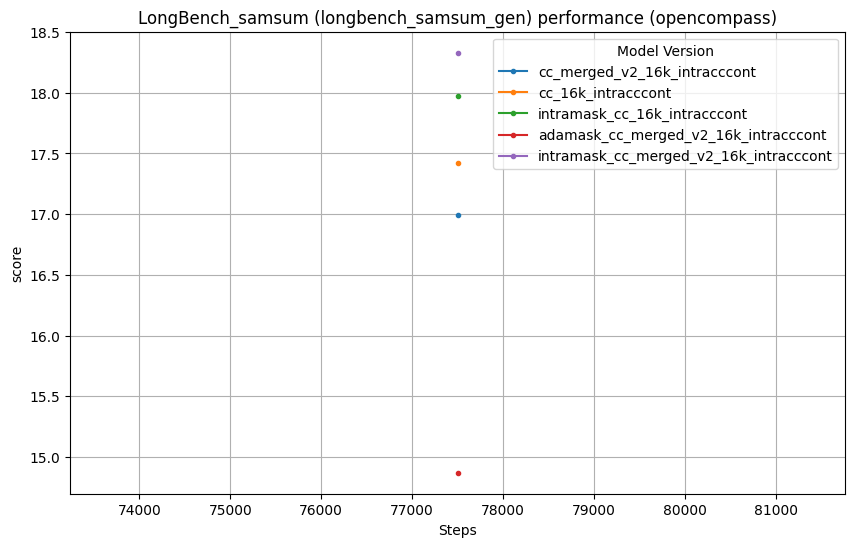

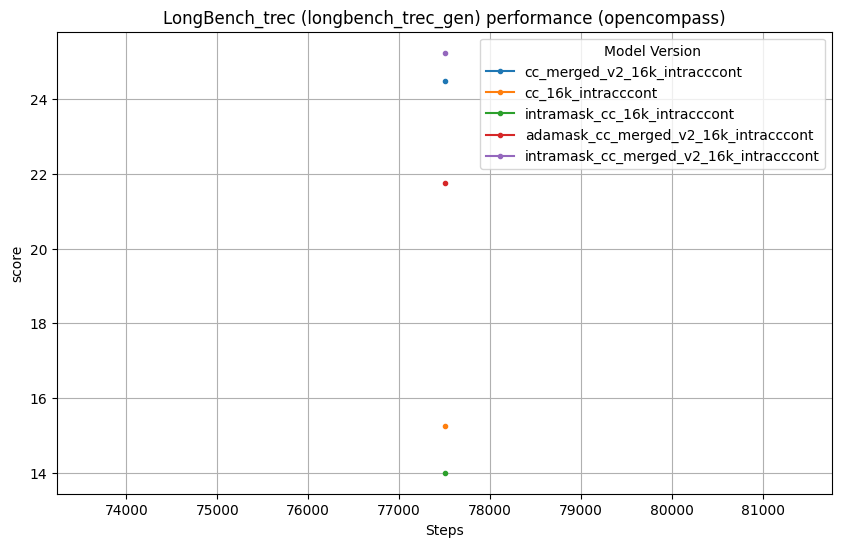

In [48]:
unique_tasks_new = df_new['task'].unique()
versions_to_meaning = {
    'cc_merged_v2_8k': 'bm25',
    'cc_8k': 'random',
    'intramask_cc_8k': 'intradoc',
    'adamask_cc_merged_v2_8k': 'adamask',
    'cc_merged_v2_8k_intracccont': 'intradoc(47.5k)->bm25',
    'cc_merged_v1_8k': 'dense',
}
INTERESTED_VERSIONS = ['cc_merged_v2_8k', 'cc_8k', 'intramask_cc_8k']
INTERESTED_VERSIONS = df_new.ds_version.unique()

df_new = df_new[df_new['ds_version'].isin(INTERESTED_VERSIONS)]
for task in unique_tasks_new:
    task_df = df_new[df_new['task'] == task ]
    plt.figure(figsize=(10, 6))
    for version in task_df['ds_version'].unique():
        version_df = task_df[task_df['ds_version'] == version ]
        plt.plot(version_df['step'], version_df['value'], marker='.', label=versions_to_meaning.get(version, version))
    plt.title(f'{task} performance (opencompass)')
    plt.xlabel('Steps')
    # metric = task_df['metric'].unique()
    # assert len(task_df['metric'].unique()) == 1
    metric = task_df['metric'].unique()[0]
    plt.ylabel(metric)
    # plt.ylabel('Value')
    plt.legend(title='Model Version')
    plt.savefig(f'/home/aiops/zhuty/tinyllama/scripts/compass_eval/figures/{task}.png')
    plt.grid(True)
    plt.show()

In [6]:
print(77500 * 8)

620000


In [2]:
folders = [
    '/home/aiops/zhuty/intracccont2_16k_models/tiny_LLaMA_1b_16k_adamask_cc_merged_v2_16k_intracccont2',
    '/home/aiops/zhuty/intracccont2_16k_models/tiny_LLaMA_1b_16k_cc_16k_intracccont2',
    '/home/aiops/zhuty/intracccont2_16k_models/tiny_LLaMA_1b_16k_cc_merged_v2_16k_intracccont2',
    '/home/aiops/zhuty/intracccont2_16k_models/tiny_LLaMA_1b_16k_intramask_cc_16k_intracccont2',
    '/home/aiops/zhuty/intracccont2_16k_models/tiny_LLaMA_1b_16k_intramask_cc_merged_v2_16k_intracccont2'
]

import os
import glob

for folder in folders:
    # assert os.path.exists(os.path.join(folder, 'iter-610000-ckpt-step-77500.pth')), folder
    # print(glob.glob(os.path.join(folder, 'iter-*80000.pth'))[0])
    print("bash checkpoint_management/convert_and_push_v2.sh ", glob.glob(os.path.join(folder, 'iter-*80000.pth'))[0])
    # new_folder = folder.replace('cont', 'cont2')
    # if not os.path.exists(new_folder):
    #     os.makedirs(new_folder)
    # print('cp /home/aiops/zhuty/tinyllama/out/tiny_LLaMA_1b_16k_cc2_16k/iter-600000-ckpt-step-75000.pth', folder.replace('cont', 'cont2'))

bash checkpoint_management/convert_and_push_v2.sh  /home/aiops/zhuty/intracccont2_16k_models/tiny_LLaMA_1b_16k_adamask_cc_merged_v2_16k_intracccont2/iter-620000-ckpt-step-80000.pth
bash checkpoint_management/convert_and_push_v2.sh  /home/aiops/zhuty/intracccont2_16k_models/tiny_LLaMA_1b_16k_cc_16k_intracccont2/iter-640000-ckpt-step-80000.pth
bash checkpoint_management/convert_and_push_v2.sh  /home/aiops/zhuty/intracccont2_16k_models/tiny_LLaMA_1b_16k_cc_merged_v2_16k_intracccont2/iter-620000-ckpt-step-80000.pth
bash checkpoint_management/convert_and_push_v2.sh  /home/aiops/zhuty/intracccont2_16k_models/tiny_LLaMA_1b_16k_intramask_cc_16k_intracccont2/iter-620000-ckpt-step-80000.pth
bash checkpoint_management/convert_and_push_v2.sh  /home/aiops/zhuty/intracccont2_16k_models/tiny_LLaMA_1b_16k_intramask_cc_merged_v2_16k_intracccont2/iter-640000-ckpt-step-80000.pth
